<a href="https://colab.research.google.com/github/mahmud-nobe/Cluster-Membership/blob/master/NGC_3293/NGC_3293.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Necessary Packages and download the csv files

#### Importing packages

In [0]:
# import packages
import pandas as pd
import pandas_profiling as pd_prof
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Use random forest to create and evaluate new model
from sklearn.ensemble import RandomForestRegressor

In [0]:
!pip install astroquery

     |████████████████████████████████| 4.5MB 5.3MB/s 
     |████████████████████████████████| 2.3MB 53.5MB/s 
  Created wheel for astroquery: filename=astroquery-0.4-cp36-none-any.whl size=3582510 sha256=f6715209807d65d4cf2d4952d7c2560c07f1f4ffcd21a7fc4f201ff7ef548189
  Stored in directory: /root/.cache/pip/wheels/a3/6d/9d/f6ceddc68de0e4b7a64b56d6e8c8075e6ef6377ec9c05ce128
Successfully built astroquery


In [0]:
# import astroquery
import astropy.units as u
import astropy.coordinates as coord
from astroquery.gaia import Gaia
from astroquery.vizier import Vizier


Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


#### Finding GAIA Data

In [0]:
## making a GAIA cone_search of 30m radius around NGC3293 center

coordinate = coord.SkyCoord.from_name('NGC3293')
print(coordinate)
radius = u.Quantity(0.5, u.deg)
j = Gaia.cone_search_async(coordinate, radius)
r = j.get_results()
print(type(r))

<SkyCoord (ICRS): (ra, dec) in deg
    (80.6608, 33.3897)>
INFO: Query finished. [astroquery.utils.tap.core]
<class 'astropy.table.table.Table'>


In [0]:
## save the ASCII table as a panadas dataframe
all_stars = r.to_pandas()
all_stars

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: TableReplaceWarning: converted column 'priam_flags' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: TableReplaceWarning: converted column 'flame_flags' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)


,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist
0,1635721458409799680,b'Gaia DR2 181173505936516096',181173505936516096,38380278,2015.5,80.662255,0.214471,33.391776,0.163487,-0.137146,0.222116,-0.617454,-0.770347,0.419928,-1.005531,0.279926,-0.522471,0.114973,-0.355620,0.508572,-0.344872,0.355994,-0.505536,0.304341,0.233166,-0.490747,130,0,130,0,-0.684951,113.852165,0.000000,0.000000,31,False,0.811621,1.497383,0.043538,-0.199583,...,1087.564501,21.043966,51.680584,17.170782,1.449518,0,1.409613,0.498276,0.911337,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',173.591429,-1.706238,82.088171,10.208598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.002406
1,1635721458409799680,b'Gaia DR2 181173505937298432',181173505937298432,112781798,2015.5,80.661158,1.231623,33.385452,0.858381,1.784363,0.775854,2.299869,-0.617252,2.037452,-0.862352,1.338031,-0.803196,-0.027160,-0.654128,0.726843,-0.145606,0.676093,-0.750083,0.213884,0.119009,-0.730865,123,0,123,0,1.200861,136.689423,1.068728,0.614021,31,False,0.061112,1.480999,0.167691,-0.265631,...,400.316771,16.080612,24.894375,18.255911,2.440752,0,2.237072,0.557058,1.680014,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',173.596127,-1.710572,82.086821,10.202347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.004253
2,1635721458409799680,b'Gaia DR2 181173505936527744',181173505936527744,428273623,2015.5,80.660995,0.470941,33.395192,0.347980,1.931945,0.479176,4.031808,-2.430243,0.961401,-9.763708,0.635847,-0.515698,0.073158,-0.168593,0.345793,-0.305007,0.345995,-0.449519,0.108615,0.349345,-0.557884,105,0,105,0,0.993742,113.993217,0.711059,0.730605,31,False,0.201747,1.245017,0.093792,-0.349415,...,631.365878,12.682353,49.783024,17.761217,1.898282,0,2.276928,0.862761,1.414167,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',173.588016,-1.705171,82.087332,10.212075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.005499
3,1635721458409799680,b'Gaia DR2 181173505937301248',181173505937301248,1622367209,2015.5,80.666841,1.809917,33.392422,1.218291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.871249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104,0,104,0,3.403123,154.124741,2.252269,2.420962,3,False,0.052717,NaN,NaN,-0.413158,...,361.186143,23.073209,15.653919,18.367592,2.443529,0,1.605667,0.068441,1.537226,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',173.593064,-1.702715,82.092096,10.208991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.005728
4,1635721458409799680,b'Gaia DR2 181173510234422912',181173510234422912,702702896,2015

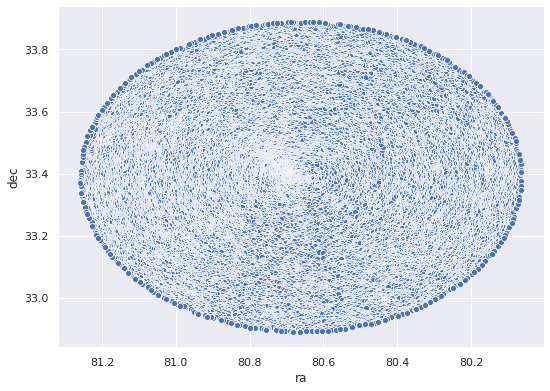

In [0]:
## plotting the skyplot 

sns.set(rc={'figure.figsize':(8.7,6.27)})

skyplot = sns.scatterplot(all_stars['ra'], all_stars['dec'])
skyplot.invert_xaxis()

#### Finding Cantat Data

In [0]:
#### Finding Cantat catalogue

catalog_list = Vizier.find_catalogs('Cantat')
{k:v.description for k,v in catalog_list.items()}

{'I/349': 'StarHorse, Gaia DR2 photo-astrometric distances (Anders+, 2019)',
 'J/A+A/561/A94': 'Velocities and photometry in Trumpler 20 (Donati+, 2014)',
 'J/A+A/564/A133': 'Gaia FGK benchmark stars: metallicity (Jofre+, 2014)',
 'J/A+A/569/A17': 'Gaia-ESO Survey: NGC6705 (Cantat-Gaudin+, 2014)',
 'J/A+A/582/A81': 'Gaia FGK benchmark stars: abundances (Jofre+, 2015)',
 'J/A+A/588/A120': 'Equivalent widths in 10 open clusters (Cantat-Gaudin+, 2016)',
 'J/A+A/591/A37': 'Gaia-ESO Survey. Parameters for cluster members (Jacobson+, 2016)',
 'J/A+A/597/A10': 'South Ecliptic Pole stars radial velocities (Fremat+, 2017)',
 'J/A+A/598/A68': 'Gaia-ESO Survey. Trumpler 23 (Overbeek+, 2017)',
 'J/A+A/601/A19': 'Gaia DR1 open cluster members (Gaia Collaboration+, 2017)',
 'J/A+A/603/A2': 'Gaia-ESO Survey abundances radial distribution (Magrini+, 2017)',
 'J/A+A/605/A79': 'TGAS Cepheids and RR Lyrae stars (Gaia Collaboration+, 2017)',
 'J/A+A/615/A49': 'TGAS stars membership in 128 open clusters (C

In [0]:
## cheking the tables in the GAIA DR2 paper

Vizier.ROW_LIMIT = -1
catalogs = Vizier.get_catalogs(catalog_list['J/A+A/633/A99'])
catalogs

TableList with 2 tables:
	'0:J/A+A/633/A99/table1' with 20 column(s) and 1481 row(s) 
	'1:J/A+A/633/A99/members' with 13 column(s) and 435833 row(s) 

In [0]:
## saving the whole cantat table 
## comment out the next two line if you want to save the full cantat table

# cantat_all = catalogs['J/A+A/633/A99/members'].to_pandas()
# cantat_all.to_csv('cantat_all.csv')

In [0]:
# help(Vizier)

In [0]:
## saving only NGC 3293 data from Cantat

cantat_3293 = Vizier(catalog = 'J/A+A/633/A99/members', row_limit = -1).query_constraints(Cluster="NGC_3293")
cantat_3293 = cantat_3293[0].to_pandas()
cantat_3293

,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,RV,Gmag,BP-RP,Proba,Cluster,_RA.icrs,_DE.icrs
0,81.149455,33.284768,182470723501404800,0.3615,0.117,-0.714,NaN,17.414000,1.2091,0.1,b'NGC_1893',81.149455,33.284771
1,81.119439,33.363766,182472308346167936,0.2641,-0.608,-0.591,39.269804,13.264800,1.9393,0.1,b'NGC_1893',81.119442,33.363768
2,81.131238,33.508885,182486842515427840,0.1172,0.070,-0.804,NaN,16.060801,1.9589,0.2,b'NGC_1893',81.131237,33.508888
3,81.006873,33.548464,182490690806147712,0.2768,-0.094,-1.682,NaN,14.954500,1.8016,0.8,b'NGC_1893',81.006874,33.548471
4,81.122228,33.440556,182485949162263680,0.2378,0.316,-1.816,NaN,17.271099,1.3154,0.3,b'NGC_1893',81.122226,33.440563
...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,80.738744,33.441257,181174128709666304,0.3098,-0.185,-1.245,NaN,14.454100,0.5358,0.9,b'NGC_1893',80.738745,33.441263
490,80.759437,33.527037,181177044990761088,0.3628,-0.031,-0.890,NaN,11.109000,0.3429,0.5,b'NGC_1893',80.759438,33.527041
491,80.486479,33.742721,181197695194288640,0.3737,0.487,-1.105,NaN,17.628500,1.3684,0.1,b'NGC_1893',80.486477,33.742726
492,80.688044,33.406547,181173643374509824,0.3148,-0.548,-1.372,NaN,12.207800,0.4295,0.6,b'NGC_1893',80.688047,33.406553


In [0]:
# renaming the cantat table to match it with gaia_data
cantat_3293 = cantat_3293.rename(columns={'Source':'source_id',
                                          'Proba':'PMemb'})


In [0]:
# taking the subset of only source_id and PMemb
cantat_3293 = cantat_3293.loc[:,['source_id', 'PMemb']]


In [0]:
# join the two table on source_id
cantat_3293 = all_stars.join(cantat_3293.set_index('source_id'), on='source_id')

In [0]:
# dropping the rows, where we don't have PMemb 
# (i.e. the source id was not in the cantat table)
cantat_3293 = cantat_3293.dropna(subset=['PMemb'])
cantat_3293

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,PMemb
4,1635721458409799680,b'Gaia DR2 181173510234422912',181173510234422912,702702896,2015.5,80.654093,0.049205,33.386971,0.041917,0.230303,0.051208,4.497412,-0.507141,0.093729,-1.359468,0.070080,-0.203515,0.086035,-0.488025,0.249101,-0.281503,0.114924,-0.695320,0.355737,0.221773,-0.065430,132,96,132,0,0.883322,140.888779,0.000000,0.000000,31,True,186.522614,1.637688,0.009515,-0.087642,...,159.862479,572.120605,12.358834,1.222980,0,0.687404,0.247120,0.440284,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',173.591533,-1.714575,82.080941,10.204250,100001.0,6277.000000,6071.000000,6562.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.006234,0.8
28,1635721458409799680,b'Gaia DR2 181173441514942336',181173441514942336,1354923743,2015.5,80.672936,0.044613,33.384418,0.032364,0.279009,0.041563,6.712915,-0.186406,0.081357,-1.609973,0.051406,-0.539708,0.024442,-0.562214,0.589747,-0.240073,0.459728,-0.644438,0.363260,0.183228,-0.422729,142,0,142,0,0.747658,149.046036,0.000000,0.000000,31,False,44.469986,1.637182,0.008829,-0.182636,...,129.242800,190.731491,13.782348,1.232768,0,0.778579,0.287061,0.491518,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',173.602548,-1.703050,82.096723,10.200671,100001.0,5861.000000,5652.966797,6197.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.011418,0.9
38,1635721458409799680,b'Gaia DR2 181173544594154880',181173544594154880,954801338,2015.5,80.677085,0.169824,33.387024,0.128158,0.386035,0.169768,2.273897,-0.672084,0.321369,-0.616524,0.215356,-0.541527,0.076860,-0.431414,0.589169,-0.289123,0.429208,-0.555432,0.357505,0.188600,-0.491669,130,0,130,0,10.059962,359.719330,0.637995,10.579637,31,False,1.450075,1.444723,0.031266,-0.202335,...,17.867135,223.005066,15.760996,1.402688,0,1.799580,0.813776,0.985804,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',173.602360,-1.698719,82.100409,10.203044,100001.0,4154.199707,3928.000000,4604.589844,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.013850,0.5
50,1635721458409799680,b'Gaia DR2 181173437217001728',181173437217001728,320558957,2015.5,80.676934,0.165926,33.381383,0.125595,0.407579,0.167347,2.435537,-0.119031,0.297418,-1.305793,0.199357,-0.541569,0.090996,-0.431434,0.580089,-0.348124,0.416018,-0.594433,0.308179,0.250723,-0.429968,142,0,142,0,0.093061,137.875626,0.000000,0.000000,31,False,1.442589,1.458911,0.031283,-0.182622,...,14.601442,102.130829,16.828039,1.356930,0,1.283445,0.485720,0.797726,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',173.606941,-1.702015,82.099906,10.197424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [0]:
# saving both cantat and Gaia files as csv
# if you want to save, comment out the next two lines

# cantat_3293.to_csv('NGC_3293_cantat.csv')
# all_stars.to_csv('NGC_3293_Gaia_30m.csv')

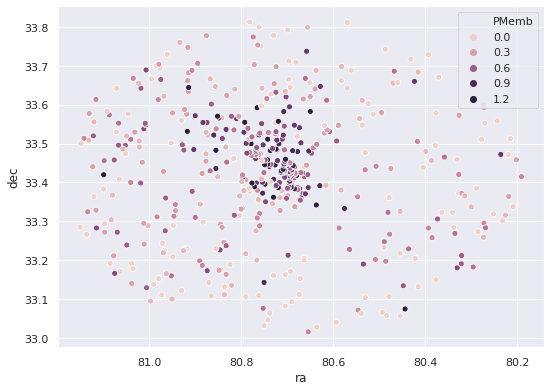

In [0]:
## plotting the skyplot 

skyplot = sns.scatterplot(cantat_3293['ra'], cantat_3293['dec'], hue = cantat_3293['PMemb'])
skyplot.invert_xaxis()

### Examining the Training Data

Separating the predictors (features) and the output (target, here PMemb) from the dataset and train the random forest model.

In [0]:
# import member dataset
member = cantat_3293

In [0]:
# Examining the descriptive statistics of each column
# (Notice BP-RP column has 9 less observation)
member.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,PMemb
count,4.940000e+02,4.940000e+02,4.940000e+02,494.0,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.0,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,...,490.000000,494.000000,4.900000e+02,490.000000,490.000000,490.000000,490.000000,494.000000,490.000000,490.000000,490.000000,5.000000,5.000000,494.000000,5.000000,5.000000,5.0,494.000000,494.000000,494.000000,494.000000,321.000000,321.000000,321.000000,321.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,34.0,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,494.000000,494.000000
mean,1.635721e+18,1.814344e+17,8.936472e+08,2015.5,80.734151,0.091323,33.426290,0.072764,0.260832,0.103529,3.338228,-0.072524,0.184716,-1.428454,0.131497,-0.231600,0.158182,-0.160820,0.265599,-0.393673,0.183398,-0.450039,0.124305,0.362198,-0.231565,144.327935,7.649798,143.414980,0.912955,1.103723,165.284882,0.095229,0.783795,31.0,25.344435,1.512272,0.019076,-0.120743,16.429150,10.253036,...,16.696733,14.629555,2.688169e+04,76.041887,290.210541,15.365031,1.321086,0.046559,1.331690,0.572978,0.758712,5.710143,0.946721,0.044534,5000.000000,3.700000,0.0,173.596764,-1.637126,82.151316,10.239250,100032.202492,5190.591309,4990.574219,5506.217285,1.518747,1.250542,1.860608,0.757675,0.617113,0.932651,200111.0,7.435204,6.378483,8.135204,72.355545,54.608341,90.102745,0.225549,0.430972
std,0.000000e+00,6.173074e+14,4.969688e+08,0.0,0.213646,0.050160,0.169935,0.038361,0.077577,0.051935,2.146540,0.388811,0.102616,0.362167,0.071498,0.196636,0.154661,0.206243,0.193390,0.115505,0.147120,0.136226,0.170797,0.116902,0.197850,19.026024,31.709585,18.894386,1.281208,3.224861,108.853348,0.166552,2.376716,0.0,64.562614,0.093334,0.009270,0.070352,2.114866,0.829686,...,1.728945,2.849579,9.767966e+04,394.197627,303.987671,1.514697,0.096385,0.238016,0.490306,0.279951,0.225750,19.388507,0.164419,0.478801,935.414368,0.758288,0.0,0.169041,0.179244,0.181693,0.169436,248.039134,1181.938721,1137.717163,1202.980469,0.557854,0.570454,0.554829,0.277287,0.283540,0.281490,0.0,5.044431,4.305860,5.516739,129.711990,98.694420,160.921814,0.121711,0.297099
min,1.635721e+18,1.809488e+17,4.099606e+06,2015.5,80.190774,0.025518,33.016201,0.020848,0.101631,0.027534,0.583325,-1.120928,0.049882,-2.314877,0.035424,-0.853669,-0.387966,-0.794187,-0.469121,-0.782534,-0.304590,-0.836786,-0.650143,-0.069962,-0.862611,88.000000,0.000000,87.000000,0.000000,-5.626834

In [0]:
# correlation of PMemb with other variables
member.corr().PMemb.dropna().sort_values()

radial_velocity             -0.796182
radial_velocity_error       -0.524897
dist                        -0.502010
dist_1893_center            -0.491018
phot_bp_mean_mag            -0.440180
                               ...   
astrometric_pseudo_colour    0.350158
teff_percentile_lower        0.434105
teff_val                     0.436625
teff_percentile_upper        0.448647
PMemb                        1.000000
Name: PMemb, Length: 89, dtype: float64

In [0]:
### adding their distance from the center of the clusters

## NGC 3293
center = coord.SkyCoord.from_name('NGC3293')
center_ra, center_dec = center.ra.degree, center.dec.degree
distance = np.sqrt( (member['ra'] - center_ra)**2 + (member['dec'] - center_dec)**2 )
member['dist_3293_center'] = distance

In [0]:
# Choosing the predictors
# Usual Parameters

feature_columns = ['ra', 'dec', 'ra_error', 'dec_error', 
                   'parallax', 'parallax_error', 'parallax_over_error',
                   'pmra', 'pmra_error', 'pmdec', 'pmdec_error',
                   'phot_g_mean_mag', 'bp_rp', 'dist_3293_center']

features = member.loc[:,feature_columns]
targets = member['PMemb']

In [0]:
# Dropping the NULL values from the using training set
# adding features and targets in a training set
training_set = pd.concat((features, targets), axis=1)

# dropping NA
training_set = training_set.dropna()

# finding where dtype is float64 as the built-in radom forest package 
# don't take 64-bit-float
float64_data = np.where(training_set.dtypes == 'float64')[0] 

# change the data type to float32 from float64
training_set.iloc[:, float64_data] = training_set.iloc[:, float64_data].astype('float32')


# set features, targets again
features, targets = training_set.iloc[:,:-1], training_set.iloc[:,-1]

features.describe()

,ra,dec,ra_error,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,phot_g_mean_mag,bp_rp,dist_1893_center
count,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000
mean,80.735222,33.427227,0.090832,0.072493,0.261297,0.103097,3.352800,-0.074705,0.182880,-1.429000,0.130489,16.123741,1.331690,0.248849
std,0.212358,0.170028,0.049691,0.038275,0.077537,0.051488,2.148229,0.388459,0.096255,0.362446,0.068936,1.628478,0.490306,0.137494
min,80.190773,33.016201,0.025518,0.020848,0.101631,0.027534,0.583325,-1.120928,0.049882,-2.314877,0.035424,9.997649,0.227479,0.007241
25%,80.654953,33.320740,0.049401,0.040025,0.208684,0.057543,1.753244,-0.321678,0.095183,-1.672837,0.067146,15.362147,1.053767,0.129981
50%,80.734997,33.436357,0.082253,0.065158,0.263347,0.093247,2.696442,-0.116347,0.175955,-1.434928,0.125467,16.631186,1.309266,0.252071
75%,80.871580,33.537964,0.122914,0.098651,0.315408,0.140845,4.502974,0.220475,0.249906,-1.218110,0.179462,17.346541,1.619764,0.370037
max,81.149452,33.812660,0.410462,0.281385,0.420209,0.291885,10.791505,0.693299,0.632556,-0.523313,0.430633,17.988209,3.861335,0.506418


In [0]:
# Profile report of the full training_set
# pd_prof.ProfileReport(training_set)

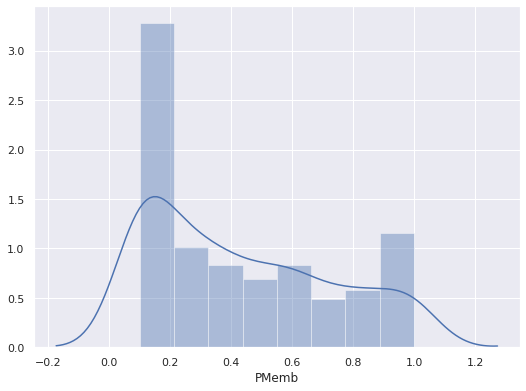

In [0]:
# histogram of PMemb in the training data
sns.distplot(training_set['PMemb'])
plt.show()

In [0]:
# Probable members (PMemb >= 0.5) in this dataset
len(training_set[training_set['PMemb'] >= 0.5])

207

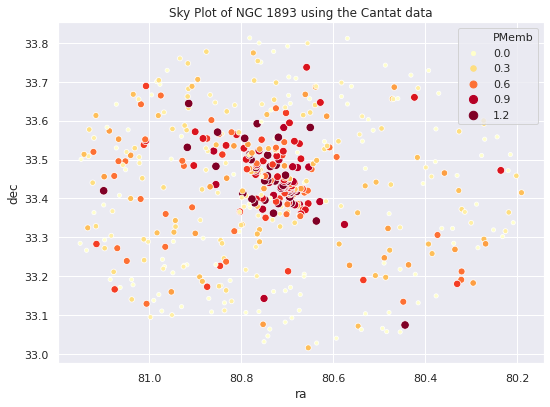

In [0]:
sns.set(rc={'figure.figsize':(8.7,6.27)})

skyplot = sns.scatterplot(x = 'ra', y='dec', hue='PMemb', palette='YlOrRd', size = 'PMemb', data = training_set)
skyplot.invert_xaxis()
plt.title('Sky Plot of NGC 3293 using the Cantat data')
plt.show()

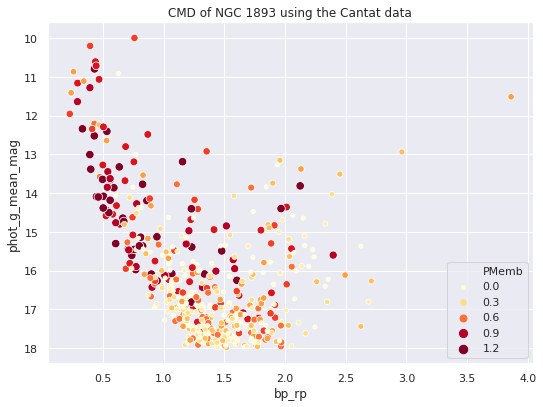

In [0]:
# CMD marked with the membership probabilities of the stars 
# (PMemb >= 0.5 stars are the probable stars)
cmd = sns.scatterplot(x = 'bp_rp', y='phot_g_mean_mag', hue='PMemb', palette='YlOrRd', size = 'PMemb', data = training_set)
cmd.invert_yaxis()
plt.title('CMD of NGC 3293 using the Cantat data')
plt.show()

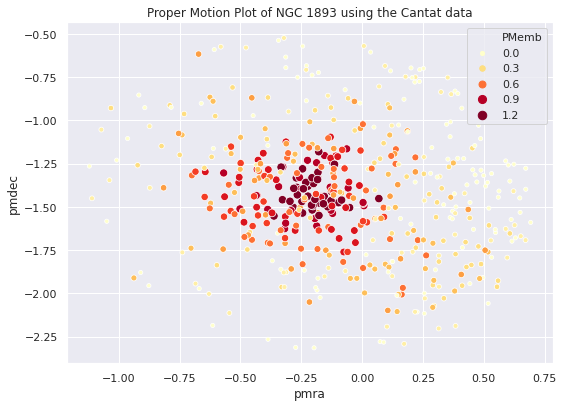

In [0]:
# proper motion plot marked with the membership probabilities of the stars 

pm_plot = sns.scatterplot(x = 'pmra', y='pmdec', hue='PMemb', palette='YlOrRd', size = 'PMemb', data = training_set)
plt.title('Proper Motion Plot of NGC 3293 using the Cantat data')
plt.show()

In [0]:
# Use Random Forest on whole dataset using 100 different trees 
rfr = RandomForestRegressor(n_estimators = 100, oob_score = True)
rfr.fit(features, targets)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
# checking the feature importance, 
# ( this is higher for a variable if the model efficiency become lower as we remove that variable)
feature_imp = pd.Series(rfr.feature_importances_, index=features.columns).sort_values(ascending = False)
feature_imp

pmra                   0.323141
pmdec                  0.220798
dist_1893_center       0.097286
bp_rp                  0.084933
dec_error              0.043394
pmra_error             0.031565
pmdec_error            0.030589
parallax               0.030199
dec                    0.029005
ra_error               0.025134
phot_g_mean_mag        0.024982
ra                     0.022638
parallax_error         0.020166
parallax_over_error    0.016169
dtype: float64

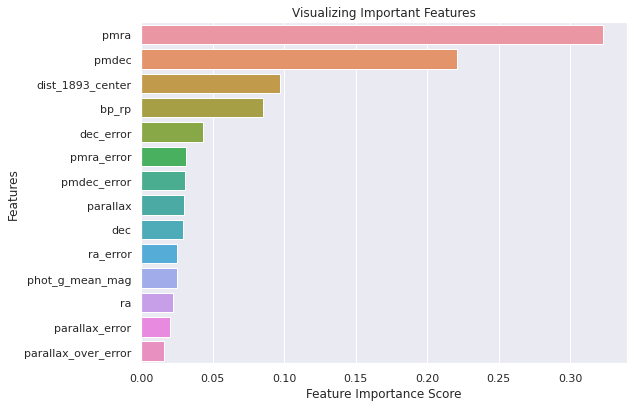

In [0]:
# plotting as a barplot

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### Estimating the Model Accuracy in Test Data

In [0]:
# function for splitting a given dataset into training and test dataset

import random
# X = predictors, Y = target
def test_train_split(X, Y, test_ratio):
  ntest = int(len(X)*test_ratio) 
  ntrain = int(len(X) - ntest)

  # randomly select ntest number of rows from the full dataset as test_index and mark others as train_index.
  ind_test = random.sample(range(len(X)), k = ntest)
  ind_train = list(set(range(len(X))) - set(ind_test))

  # test and train dataset has the observations of test_indices and train_indices respectively
  test_X = X.iloc[ind_test]
  test_Y = Y.iloc[ind_test]

  train_X = X.iloc[ind_train]
  train_Y = Y.iloc[ind_train]

  return test_X, test_Y, train_X, train_Y

In [0]:
# splitting our dataset using 0.3 test ratio (30% test data, 70% train data)
test_features, test_targets, train_features, train_targets = test_train_split(features, targets, 0.3)


In [0]:
# train the model using only training subset
rfr.fit(train_features, train_targets)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
# find the accuracy rate to predict the outcome for test subset
test_predict = rfr.predict(test_features)
rfr.score(test_features, test_targets)

0.7273561196228278

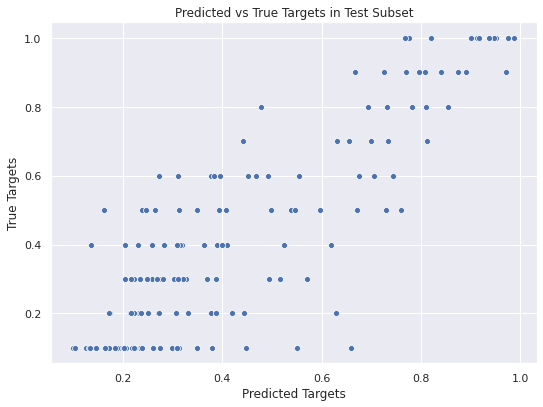

In [0]:
# plot Predicted vs True Targets in Test Subset

sns.scatterplot(test_predict, test_targets)
plt.title('Predicted vs True Targets in Test Subset')
plt.ylabel('True Targets')
plt.xlabel('Predicted Targets')
plt.show()

In [0]:
# Check with different test ratio

test_ratio = np.linspace(0.95, 0.05, 19)
print(test_ratio)

[0.95 0.9  0.85 0.8  0.75 0.7  0.65 0.6  0.55 0.5  0.45 0.4  0.35 0.3
 0.25 0.2  0.15 0.1  0.05]


In [0]:
# for each test_ratio, estimate the accuracy of the model

accuracy_rate = []

rfr = RandomForestRegressor(n_estimators = 100, oob_score = True)

for ratio in test_ratio:
  
  accuracy = 0
  for iter in range(20):
    test_features, test_targets, train_features, train_targets = test_train_split(features, targets, ratio)

    # train the model using only training subset
    rfr.fit(train_features, train_targets)

    # find the accuracy rate to predict the outcome for test subset
    test_predict = rfr.predict(test_features)
    accuracy += rfr.score(test_features, test_targets)

  accuracy_rate.append(accuracy/20)

print(accuracy_rate)

[0.3450027039414046, 0.40988984736457096, 0.4866272115349182, 0.53864768713197, 0.5532836812663269, 0.5962786661274818, 0.6207171148974433, 0.639806168448459, 0.6611326388426453, 0.6780058754759917, 0.6891641901791994, 0.681028947563907, 0.7091668331660659, 0.7239461187710773, 0.7138502800496545, 0.7225541682201161, 0.7529738544539264, 0.7014202559953879, 0.7150664696345399]


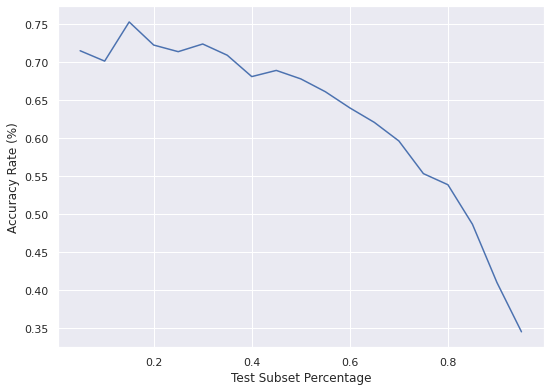

In [0]:
# plotting the accuracy rate vs test-ratio

sns.lineplot(test_ratio, accuracy_rate)
plt.xlabel('Test Subset Percentage')
plt.ylabel('Accuracy Rate (%)')
plt.show()

### Prediction of PMemb for the new stars

In [0]:
# descriptive stats
all_stars.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist
count,3.308100e+04,3.308100e+04,3.308100e+04,33081.0,33081.000000,33081.000000,33081.000000,33081.000000,25686.000000,25686.000000,25686.000000,25686.000000,25686.000000,25686.000000,25686.000000,33081.000000,25686.000000,25686.000000,25686.000000,25686.000000,25686.000000,25686.000000,25686.000000,25686.000000,25686.000000,33081.000000,33081.000000,33081.000000,33081.000000,33081.000000,3.308100e+04,33081.000000,33081.000000,33081.000000,33081.000000,25382.000000,25382.000000,33081.000000,33081.000000,33081.000000,...,31331.000000,31331.000000,33081.000000,3.134100e+04,31341.000000,31341.000000,31341.000000,31327.000000,33081.000000,31327.000000,31331.000000,31341.000000,189.000000,189.000000,33081.000000,189.000000,189.000000,189.000000,33081.000000,33081.000000,33081.000000,33081.000000,5058.000000,5058.000000,5058.000000,5058.000000,2645.000000,2645.000000,2645.000000,2645.000000,2645.000000,2645.000000,2388.0,2388.000000,2388.000000,2388.000000,2388.000000,2388.000000,2388.000000,33081.000000
mean,1.635721e+18,1.814850e+17,8.484522e+08,2015.5,80.684862,1.582466,33.390822,1.053936,0.440379,0.446793,3.276135,1.083263,0.943885,-2.621898,0.633642,-0.350102,0.051630,-0.182751,0.241989,-0.336417,0.231062,-0.438717,0.078564,0.329004,-0.344813,122.669569,1.424776,121.997733,0.671836,1.981989,3.985053e+02,0.720933,11.874334,24.740818,4.821290,1.449132,0.085209,-0.187087,14.077779,8.969983,...,55.093578,19.224129,11.632266,6.806851e+03,28.401622,101.440781,17.703989,1.683101,0.094223,1.520767,0.465032,1.055821,4.596878,2.193017,0.027720,5265.873047,3.589947,-0.071429,173.602586,-1.691002,82.107258,10.206680,100566.116449,4932.338379,4751.184570,5206.836426,0.964138,0.723131,1.241416,0.477827,0.356834,0.618233,200111.0,2.334826,2.114119,2.510300,7.394716,6.095416,8.694025,0.330239
std,0.000000e+00,6.613198e+14,4.869411e+08,0.0,0.304703,3.473270,0.242820,2.161573,0.899016,0.385566,8.980660,4.544603,0.886570,5.948307,0.567238,0.326495,0.217376,0.278920,0.233056,0.182005,0.197497,0.161447,0.203497,0.169986,0.209058,33.760855,14.272098,33.586841,1.109340,9.987595,1.015740e+04,1.313539,423.810328,11.665498,27.454653,0.142602,0.076876,0.131455,3.764970,1.813302,...,112.755356,1.718597,4.554917,8.860432e+04,318.260903,173.551117,1.605567,0.509533,0.397594,0.386715,0.383827,0.293646,34.793143,2.612757,0.386657,705.986572,0.633594,0.320287,0.244128,0.253266,0.258817,0.242499,3383.741419,772.932739,754.506897,803.520081,0.571180,0.540592,0.635202,0.286530,0.268826,0.322192,0.0,3.724323,3.378359,4.013069,31.749968,26.259209,37.392887,0.122611
min,1.635721e+18,1.809342e+17,2.159000e+03,2015.5,80.062933,0.021139,32.889909,0.017093,-12.308459,0.02

In [0]:
### adding their distance from the center of the clusters

## NGC 3293
center = coord.SkyCoord.from_name('NGC3293')
center_ra, center_dec = center.ra.degree, center.dec.degree
distance = np.sqrt( (all_stars['ra'] - center_ra)**2 + (all_stars['dec'] - center_dec)**2 )
all_stars['dist_3293_center'] = distance

In [0]:
all_stars = all_stars.dropna(subset = feature_columns)

In [0]:
# select the set of predictor variables from the new dataset
new_features = all_stars.loc[:, feature_columns]
new_features = new_features.astype('float32')

In [0]:
# train the model again using all the features and targets of the previous dataset
rfr.fit(features, targets)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
# estimate the membership probability of the stars
all_stars['PMemb'] = rfr.predict(new_features)
sum(all_stars['PMemb'] >= 0.5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


244

In [0]:
potentialMember = all_stars[all_stars['PMemb'] >= 0.5]
len(potentialMember)

244

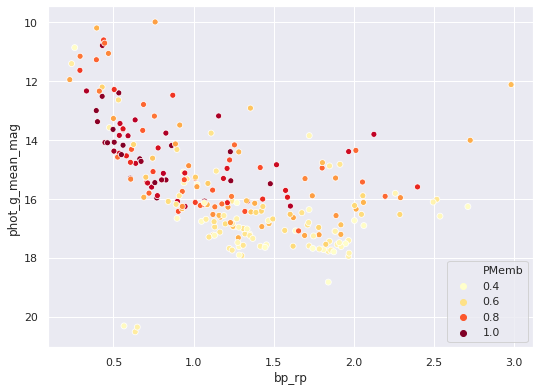

In [0]:
# CMD of probable members 

cmd = sns.scatterplot(x = 'bp_rp', y = 'phot_g_mean_mag', hue= 'PMemb', 
                      palette='YlOrRd', data = all_stars[all_stars['PMemb'] >= 0.5] )
cmd.invert_yaxis()

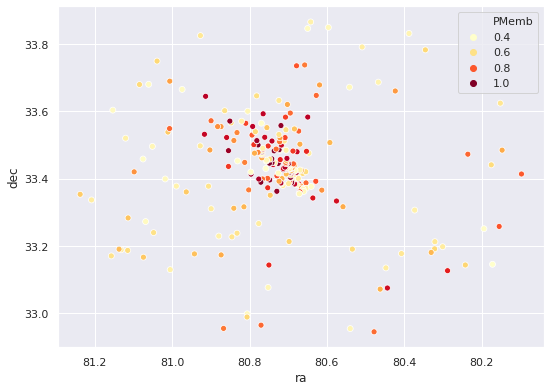

In [0]:
skyplot = sns.scatterplot(x = 'ra', y = 'dec', hue= 'PMemb', 
                      palette='YlOrRd', data = all_stars[all_stars['PMemb'] >= 0.5] )
skyplot.invert_xaxis()

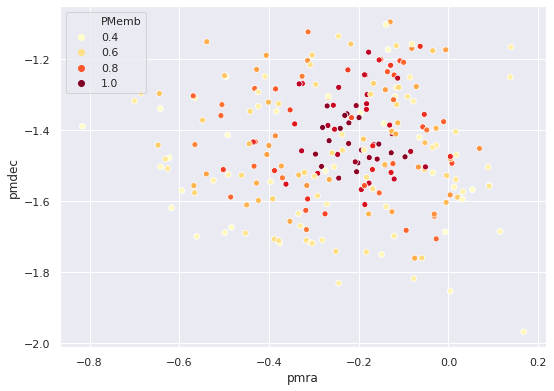

In [0]:
# pm plot
sns.scatterplot(x = 'pmra', y = 'pmdec', hue= 'PMemb', 
                      palette='YlOrRd', data = all_stars[all_stars['PMemb'] >= 0.5] )

In [0]:
potentialMember.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,dist_1893_center,PMemb
count,2.440000e+02,2.440000e+02,2.440000e+02,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,...,244.000000,2.440000e+02,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,2.000000,2.000000,244.000000,2.000000,2.000000,2.0,244.000000,244.000000,244.000000,244.000000,193.000000,193.000000,193.000000,193.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,29.0,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,244.000000,244.000000,244.000000
mean,1.635721e+18,1.813531e+17,8.795888e+08,2015.5,80.726315,0.085628,33.429075,0.068541,0.262443,0.101006,4.136248,-0.241469,0.173661,-1.446005,0.122339,-0.213138,0.179162,-0.146934,0.263802,-0.420255,0.153472,-0.455300,0.152893,0.378646,-0.185852,144.348361,13.229508,143.286885,1.061475,1.197138,166.252274,0.088648,0.757251,31.0,40.911270,1.528424,0.018650,-0.117908,16.393443,10.340164,...,14.790984,4.070275e+04,96.493489,351.918335,14.883793,1.327103,0.045082,1.226094,0.512200,0.713894,33.685564,0.836710,0.028689,5000.000000,3.250000,0.0,173.590791,-1.640971,82.144862,10.242431,100260.119171,5456.579590,5243.952637,5780.821289,1.294729,1.025371,1.643343,0.644566,0.507663,0.818143,200111.0,5.261677,4.696709,5.678112,63.855156,48.107445,79.602844,0.187742,0.206596,0.711787
std,0.000000e+00,5.347038e+14,5.246617e+08,0.0,0.192891,0.116293,0.161467,0.087837,0.317443,0.128858,4.456147,0.187212,0.262210,0.165186,0.167638,0.175173,0.136451,0.169614,0.170249,0.112123,0.125074,0.119991,0.149233,0.101995,0.184731,17.317822,40.874955,17.199856,1.576679,3.258537,76.946342,0.215900,2.187273,0.0,83.936569,0.109375,0.026363,0.072204,1.931150,0.798059,...,2.635887,1.242368e+05,284.205814,381.986847,1.652458,0.192248,0.207910,0.561015,0.329820,0.271698,50.285268,0.042288,0.344260,1414.213623,0.353553,0.0,0.155430,0.166926,0.164492,0.160613,1525.890212,1328.786011,1270.797485,1350.345337,0.569497,0.597995,0.598318,0.284215,0.294471,0.296334,0.0,5.067040,4.563983,5.404071,139.941269,106.231026,173.849640,0.145531,0.162134,0.154764
min,1.635721e+18,1.809465e+17,6.862069e+06,2015.5,80.097003,0.025518,32.944767,0.021401,-0.967698,0.027534,-1.559432,-0.815921,0.049882,-1.968271,0.035424,-0.686320,-0.228464,-0.562214,-0.330152,-0.753438,-0.366781,-0.763957,-0.542787,0.014066,-0.808044,106.000000,0.000000,106.000000,0.000000,-5.882625

In [0]:
member.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,PMemb,dist_1893_center
count,4.940000e+02,4.940000e+02,4.940000e+02,494.0,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.0,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,...,494.000000,4.900000e+02,490.000000,490.000000,490.000000,490.000000,494.000000,490.000000,490.000000,490.000000,5.000000,5.000000,494.000000,5.000000,5.000000,5.0,494.000000,494.000000,494.000000,494.000000,321.000000,321.000000,321.000000,321.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,34.0,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,494.000000,494.000000,494.000000
mean,1.635721e+18,1.814344e+17,8.936472e+08,2015.5,80.734151,0.091323,33.426290,0.072764,0.260832,0.103529,3.338228,-0.072524,0.184716,-1.428454,0.131497,-0.231600,0.158182,-0.160820,0.265599,-0.393673,0.183398,-0.450039,0.124305,0.362198,-0.231565,144.327935,7.649798,143.414980,0.912955,1.103723,165.284882,0.095229,0.783795,31.0,25.344435,1.512272,0.019076,-0.120743,16.429150,10.253036,...,14.629555,2.688169e+04,76.041887,290.210541,15.365031,1.321086,0.046559,1.331690,0.572978,0.758712,5.710143,0.946721,0.044534,5000.000000,3.700000,0.0,173.596764,-1.637126,82.151316,10.239250,100032.202492,5190.591309,4990.574219,5506.217285,1.518747,1.250542,1.860608,0.757675,0.617113,0.932651,200111.0,7.435204,6.378483,8.135204,72.355545,54.608341,90.102745,0.225549,0.430972,0.249555
std,0.000000e+00,6.173074e+14,4.969688e+08,0.0,0.213646,0.050160,0.169935,0.038361,0.077577,0.051935,2.146540,0.388811,0.102616,0.362167,0.071498,0.196636,0.154661,0.206243,0.193390,0.115505,0.147120,0.136226,0.170797,0.116902,0.197850,19.026024,31.709585,18.894386,1.281208,3.224861,108.853348,0.166552,2.376716,0.0,64.562614,0.093334,0.009270,0.070352,2.114866,0.829686,...,2.849579,9.767966e+04,394.197627,303.987671,1.514697,0.096385,0.238016,0.490306,0.279951,0.225750,19.388507,0.164419,0.478801,935.414368,0.758288,0.0,0.169041,0.179244,0.181693,0.169436,248.039134,1181.938721,1137.717163,1202.980469,0.557854,0.570454,0.554829,0.277287,0.283540,0.281490,0.0,5.044431,4.305860,5.516739,129.711990,98.694420,160.921814,0.121711,0.297099,0.137301
min,1.635721e+18,1.809488e+17,4.099606e+06,2015.5,80.190774,0.025518,33.016201,0.020848,0.101631,0.027534,0.583325,-1.120928,0.049882,-2.314877,0.035424,-0.853669,-0.387966,-0.794187,-0.469121,-0.782534,-0.304590,-0.836786,-0.650143,-0.069962,-0.862611,88.000000,0.000000,87.000000,0.000000,-5.626834,

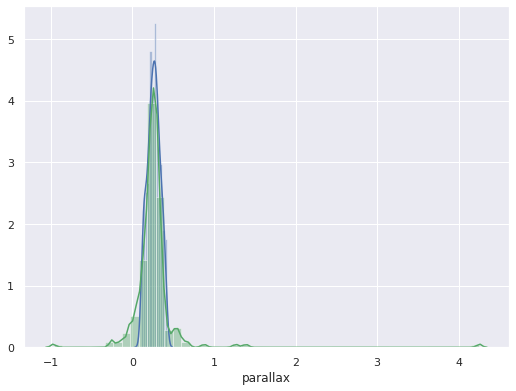

In [0]:
sns.distplot(member['parallax'], color = 'b')
sns.distplot(potential_member['parallax'], color = 'g')

In [0]:
# saving the files as csv

# all_stars.to_csv('gaia_3293_membership_prob.csv')
# potential_member.to_csv('potential.csv')

### Comparing the new and old probable members

In [0]:
# creating subset for the potential member in previous dataset

potential_Old_Member = member[member['PMemb'] >= 0.5]


concatenated = pd.concat([potentialMember.assign(dataset='New_member'), potential_Old_Member.assign(dataset='Old_member')])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


In [0]:
concatenated

,PMemb,a_g_percentile_lower,a_g_percentile_upper,a_g_val,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_gof_al,astrometric_matched_observations,astrometric_n_bad_obs_al,astrometric_n_good_obs_al,astrometric_n_obs_ac,astrometric_n_obs_al,astrometric_params_solved,astrometric_primary_flag,astrometric_pseudo_colour,astrometric_pseudo_colour_error,astrometric_sigma5d_max,astrometric_weight_al,b,bp_g,bp_rp,datalink_url,dataset,dec,dec_error,dec_parallax_corr,dec_pmdec_corr,dec_pmra_corr,designation,dist,dist_1893_center,duplicated_source,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,e_bp_min_rp_val,ecl_lat,ecl_lon,epoch_photometry_url,flame_flags,...,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_g_n_obs,phot_proc_mode,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_rp_n_obs,phot_variable_flag,pmdec,pmdec_error,pmra,pmra_error,pmra_pmdec_corr,priam_flags,ra,ra_dec_corr,ra_error,ra_parallax_corr,ra_pmdec_corr,ra_pmra_corr,radial_velocity,radial_velocity_error,radius_percentile_lower,radius_percentile_upper,radius_val,random_index,ref_epoch,rv_nb_transits,rv_template_fe_h,rv_template_logg,rv_template_teff,solution_id,source_id,teff_percentile_lower,teff_percentile_upper,teff_val,visibility_periods_used
4,0.785,NaN,NaN,NaN,140.888779,0.000000,0.000000e+00,0.883322,15,0,132,96,132,31,True,1.637688,0.009515,0.066496,186.522614,-1.714575,0.247120,0.687404,b'https://gea.esac.esa.int/data-server/datalin...,New_member,33.386971,0.041917,-0.281503,-0.695320,0.114924,b'Gaia DR2 181173510234422912',0.006234,0.007241,False,NaN,NaN,NaN,10.204250,82.080941,b'',NaN,...,42.220182,3389.839111,12.799118,127,0,91460.614831,159.862479,572.120605,12.358834,14,b'NOT_AVAILABLE',-1.359468,0.070080,-0.507141,0.093729,-0.065430,100001.0,80.654093,-0.203515,0.049205,0.086035,0.249101,-0.488025,NaN,NaN,NaN,NaN,NaN,702702896,2015.5,0,NaN,NaN,NaN,1635721458409799680,181173510234422912,6071.000000,6562.000000,6277.000000,9
28,0.892,NaN,NaN,NaN,149.046036,0.000000,0.000000e+00,0.747658,16,0,142,0,142,31,False,1.637182,0.008829,0.094717,44.469986,-1.703050,0.287061,0.778579,b'https://gea.esac.esa.int/data-server/datalin...,New_member,33.384418,0.032364,-0.240073,-0.644438,0.459728,b'Gaia DR2 181173441514942336',0.011418,0.013235,False,NaN,NaN,NaN,10.200671,82.096723,b'',NaN,...,15.469967,2378.541748,14.273866,139,0,24650.671895,129.242800,190.731491,13.782348,13,b'NOT_AVAILABLE',-1.609973,0.051406,-0.186406,0.081357,-0.422729,100001.0,80.672936,-0.539708,0.044613,0.024442,0.589747,-0.562214,NaN,NaN,NaN,NaN,NaN,1354923743,2015.5,0,NaN,NaN,NaN,1635721458409799680,181173441514942336,5652.966797,6197.000000,5861.000000,10
34,0.746,NaN,NaN,NaN,169.984512,0.137443,1.668996e+00,3.086043,14,0,122,0,122,31,False,1.599796,0.011211,0.103164,16.438007,-1.711033,0.383316,0.969262,b'https://gea.esac.esa.int/data-server/datalin...,New_member,33.377430,0.047350,-0.425720,-0.567318,0.243761,b'Gaia DR2 181173441514945920',0.013338,0.013786,False,NaN,NaN,NaN,10.194018,82.091305,b'',NaN,...,13.077813,1612.975464,14.877958,122,0,15415.691958,40.029297,385.110229,14.292012,13,b'NOT_AVAILABLE',-1.416479,0.072004,-0.385934,0.106208,-0.117795,100001.0,80.667085,-0.495663,0.063074,0.436969,0.606204,-0.157465,NaN,NaN,NaN,NaN,NaN,665280227,2015.5,0,NaN,NaN,NaN,1635721458409799680,181173441514945920,5089.666504,5370.000000,5312.709961,8
49,0.570,NaN,NaN,NaN,163.133240,0.300521,1.209444e+00,2.122658,15,1,132,0,133,31,False,1.416722,0.032090,0.313048,1.468725,-1.693281,0.811121,1.847298,b'https://gea.esac.esa.int/data-server/datalin...,New_member,33.400444,0.139412,-0.495027,-0.609360,0.302073,b'Gaia DR2 181173609015769472',0.015361,0.016982,False,NaN,NaN,NaN,10.216606,82.098650,b'',NaN,...,4.352744,456.290009,17.443356,130,0,2197.335030,24.962734,88.024612,16.407179,14,b'NOT_AVAILABLE',-1.305973,0.212685,-0.091192,0.304371,-0.415651,NaN,80.673952,-0.640027,0.183574,0.323751,0

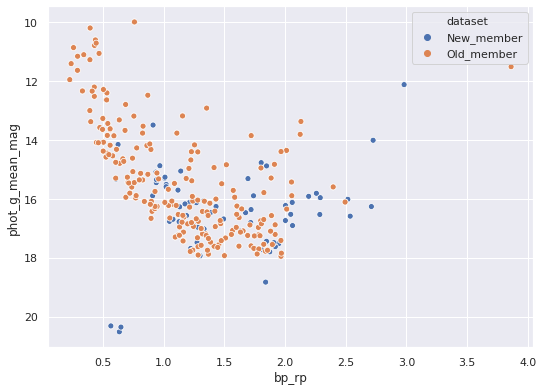

In [0]:
cmd = sns.scatterplot(x='bp_rp', y='phot_g_mean_mag', data=concatenated,
                hue='dataset')
cmd.invert_yaxis()

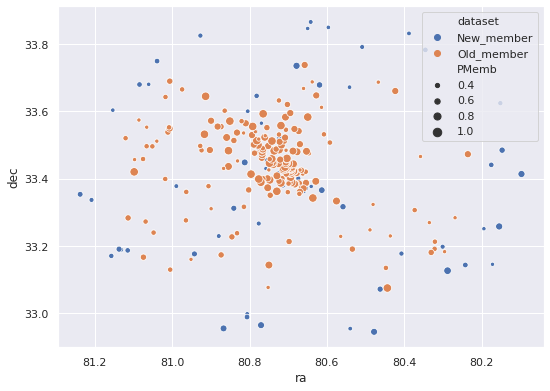

In [0]:
skyplot = sns.scatterplot(x='ra', y='dec', data=concatenated,
                size='PMemb', hue='dataset')
skyplot.invert_xaxis()

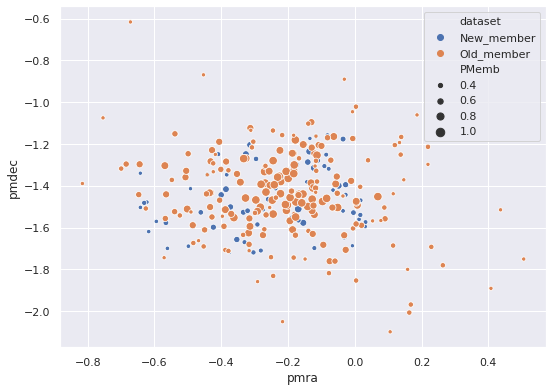

In [0]:
# proper motion plot

sns.scatterplot(x='pmra', y='pmdec', data=concatenated,
                size='PMemb', hue='dataset')

In [0]:
# pd_prof.ProfileReport(potentialMember)